In [29]:
ROOT <- '/Users/dongmeichen/Documents/beetle'
DATA <- sprintf('%s/data', ROOT)
data <- read.csv(sprintf('%s/mpb10km_data.csv', DATA))
head(data)

lon,lat,etopo1,x,y,beetleAcres,host,forest,mStdAge,density,⋯,Jan20,PcumOctSep,SprsCosts,SprsAcres,SprsCPA,SprsFires,PctSprs,SprsAcre,SprsDays,OutDays
-124.2879,40.21671,201.27065,-1000000,-460000,NA,0,0,151.00000,27214.52,⋯,0,3704.248,275000,60,4583.333,NA,NA,NA,NA,NA
-124.3038,40.30570,179.37590,-1000000,-450000,NA,0,1,65.00000,31180.24,⋯,0,3634.644,NA,NA,NA,1,1,30.0,2,4
-124.3199,40.39468,323.83456,-1000000,-440000,NA,0,0,10.00000,48738.07,⋯,0,3577.369,NA,NA,NA,NA,NA,NA,NA,NA
-124.3360,40.48366,266.47128,-1000000,-430000,NA,0,1,74.00000,46378.85,⋯,0,3326.268,NA,NA,NA,NA,NA,NA,NA,NA
-124.3522,40.57263,30.87853,-1000000,-420000,NA,0,1,110.00000,13017.31,⋯,0,3122.938,NA,NA,NA,1,1,0.1,0,2
-124.1555,40.14040,296.74728,-990000,-470000,NA,1,1,53.63779,50787.85,⋯,0,3554.745,33900000,24882,1362.431,3,1,5762.0,12,84


In [30]:
sprs.vars <- c('SprsCosts', 'SprsAcres', 'SprsCPA', 'SprsFires', 'PctSprs', 'SprsAcre', 'SprsDays', 'OutDays')
#drop <- c('x', 'y', 'SprsCosts', 'SprsAcres', 'SprsCPA')
#drop <- c('x', 'y', sprs.vars, 'PctLarge', 'PctOld')
drop <- c(sprs.vars, 'PctLarge', 'PctOld') # get xy
data <- data[, -which(names(data) %in% drop)]
head(data)

lon,lat,etopo1,x,y,beetleAcres,host,forest,mStdAge,density,⋯,Tmin,winterMin,summerTmean,Pmean,summerP1,minT,JanMin,TOctSep,Jan20,PcumOctSep
-124.2879,40.21671,201.27065,-1000000,-460000,NA,0,0,151.00000,27214.52,⋯,4.300880,-0.3913830,13.24423,152.3560,23.71749,-0.4697025,1.3934664,10.44481,0,3704.248
-124.3038,40.30570,179.37590,-1000000,-450000,NA,0,1,65.00000,31180.24,⋯,4.677154,-0.4594108,13.36685,149.4249,23.66691,-0.5552364,1.3374767,10.67275,0,3634.644
-124.3199,40.39468,323.83456,-1000000,-440000,NA,0,0,10.00000,48738.07,⋯,4.568102,-0.5262523,13.00367,147.0311,25.13007,-0.6243961,1.2732506,10.41098,0,3577.369
-124.3360,40.48366,266.47128,-1000000,-430000,NA,0,1,74.00000,46378.85,⋯,5.074779,-0.5364145,13.30198,137.1092,27.33504,-0.6098503,1.2720708,10.76958,0,3326.268
-124.3522,40.57263,30.87853,-1000000,-420000,NA,0,1,110.00000,13017.31,⋯,5.689375,-0.4939479,13.73137,128.9207,27.47693,-0.5489751,1.3178075,11.26455,0,3122.938
-124.1555,40.14040,296.74728,-990000,-470000,NA,1,1,53.63779,50787.85,⋯,3.844134,-0.9450639,13.53127,146.1888,24.23230,-1.0233228,0.8641355,10.39499,0,3554.745


In [3]:
summary(data$SprsCPA)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   38.77  263.02     Inf 1326.39     Inf   31085 

In [4]:
sum(!(is.finite(data$SprsCPA)))

[1] 31122

In [31]:
names(data)

[1] "lon"         "lat"         "etopo1"      "x"           "y"          
 [6] "beetleAcres" "host"        "forest"      "mStdAge"     "density"    
[11] "vcc"         "mfri"        "prs"         "pms"         "pls"        
[16] "GAP1"        "GAP2"        "GAP3"        "vpd"         "cwd"        
[21] "maxAugT"     "summerP0"    "Tmean"       "mi"          "Tvar"       
[26] "wd"          "AugTmean"    "OctTmin"     "AugMaxT"     "AugTmax"    
[31] "Acs"         "MarMin"      "ddAugJun"    "ddAugJul"    "JanTmin"    
[36] "PPT"         "summerP2"    "TMarAug"     "Mar20"       "fallTmean"  
[41] "MarTmin"     "maxT"        "Tmin"        "winterMin"   "summerTmean"
[46] "Pmean"       "summerP1"    "minT"        "JanMin"      "TOctSep"    
[51] "Jan20"       "PcumOctSep"

In [32]:
data$vcc[data$vcc > 6] <- NA
data$prs[data$prs > 20] <- NA
data$pms[data$pms > 20] <- NA
data$pls[data$pls > 20] <- NA
data$mfri[data$mfri > 22] <- NA

In [33]:
dim(data)

[1] 36965    52

In [34]:
sum(complete.cases(data))

[1] 7636

In [35]:
comp <- data[complete.cases(data), ]

In [36]:
xy <- comp[,c('x', 'y')]

In [37]:
write.csv(xy, sprintf('%s/mpb10km_data_wo_FIA_xy.csv', DATA), row.names=FALSE)

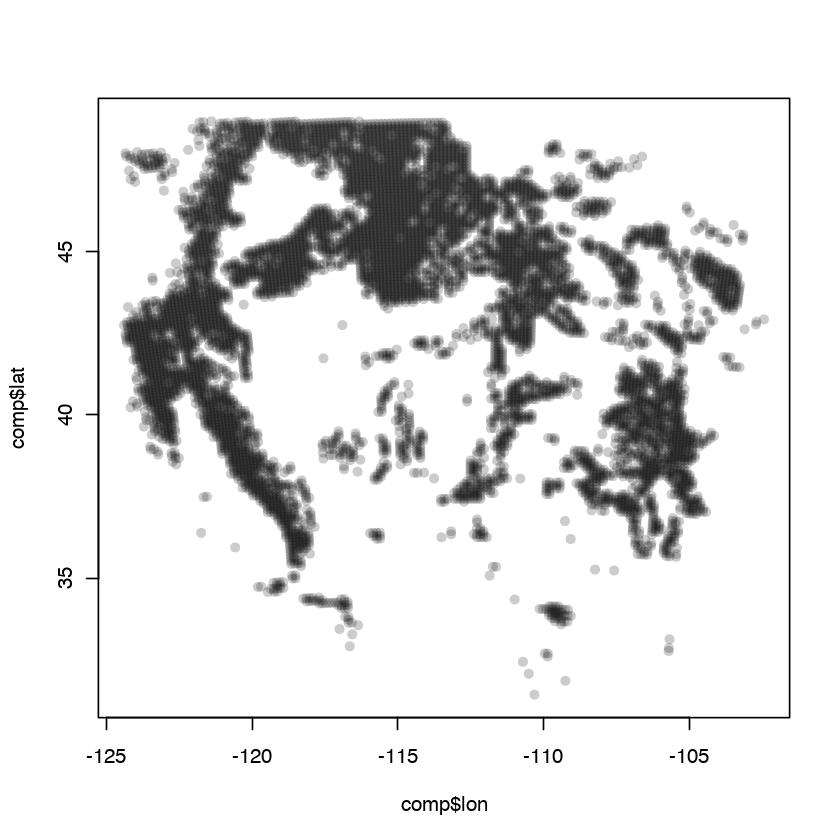

In [8]:
plot(comp$lon, comp$lat, pch=16, col=rgb(0, 0, 0, 0.2))

In [9]:
for (field in names(data)) {
  cat(sprintf('%20s: %d\n', field, sum(is.na(data[, field]))))
}

                 lon: 0
                 lat: 0
              etopo1: 0
         beetleAcres: 28011
                host: 0
              forest: 0
             mStdAge: 19542
             density: 290
                 vcc: 7231
                mfri: 2652
                 prs: 1758
                 pms: 1740
                 pls: 1688
                GAP1: 0
                GAP2: 0
                GAP3: 0
                 vpd: 56
                 cwd: 56
             maxAugT: 56
            summerP0: 56
               Tmean: 56
                  mi: 56
                Tvar: 56
                  wd: 56
            AugTmean: 56
             OctTmin: 56
             AugMaxT: 56
             AugTmax: 56
                 Acs: 56
              MarMin: 56
            ddAugJun: 56
            ddAugJul: 56
             JanTmin: 56
                 PPT: 56
            summerP2: 56
             TMarAug: 56
               Mar20: 56
           fallTmean: 56
             MarTmin: 56
                

In [12]:
comp <- comp[is.finite(comp$SprsCPA), ]
dim(comp)
#indata <- subset(comp, beetleAcres > 0)

[1] 828  58

In [10]:
indata <- comp
dim(indata)

[1] 7636   50

In [11]:
library(classInt)
library(RColorBrewer)

Loading required package: spData
To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source'))`


In [12]:
nclr <- 8
plotclr <- brewer.pal(nclr,"YlOrRd")
plotvar <- indata$beetleAcres
class <- classIntervals(plotvar, nclr, style="kmeans")
colcode <- findColours(class, plotclr)

In [13]:
library(rgdal)

Loading required package: sp
rgdal: version: 1.2-18, (SVN revision 718)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.3, released 2017/20/01
 Path to GDAL shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/gdal
 GDAL binary built with GEOS: FALSE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/proj
 Linking to sp version: 1.2-7 


In [14]:
mpb10km_us_line <- readOGR(dsn='/Users/dongmeichen/Documents/beetle/shp', 
                           layer='mpb10km_us_line')
mpb_projstr <- "+proj=laea +lon_0=-112.5 +lat_0=45 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
proj4string(mpb10km_us_line) <- mpb_projstr

OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/beetle/shp", layer: "mpb10km_us_line"
with 17 features
It has 2 fields


In [15]:
lonlat <- CRS("+proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0")
mpb10km_us_line_lonlat <- spTransform(mpb10km_us_line, lonlat)

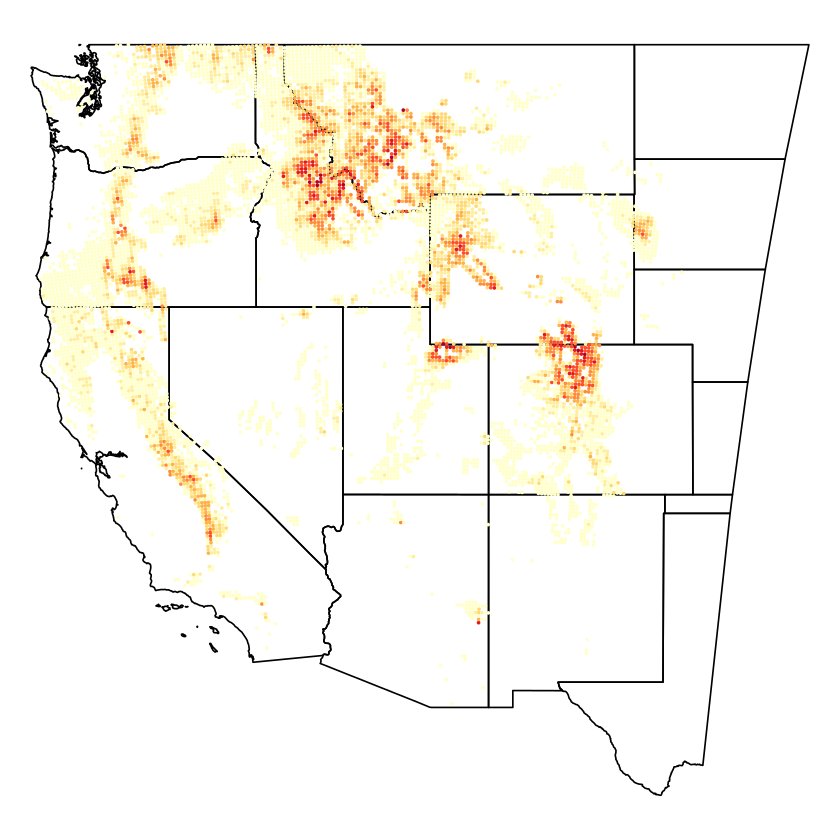

In [16]:
par(mfrow=c(1,1),mar=c(0,0,0,0))
plot(mpb10km_us_line_lonlat)
points(indata$lon, indata$lat, pch=16, col=colcode, cex=0.3)

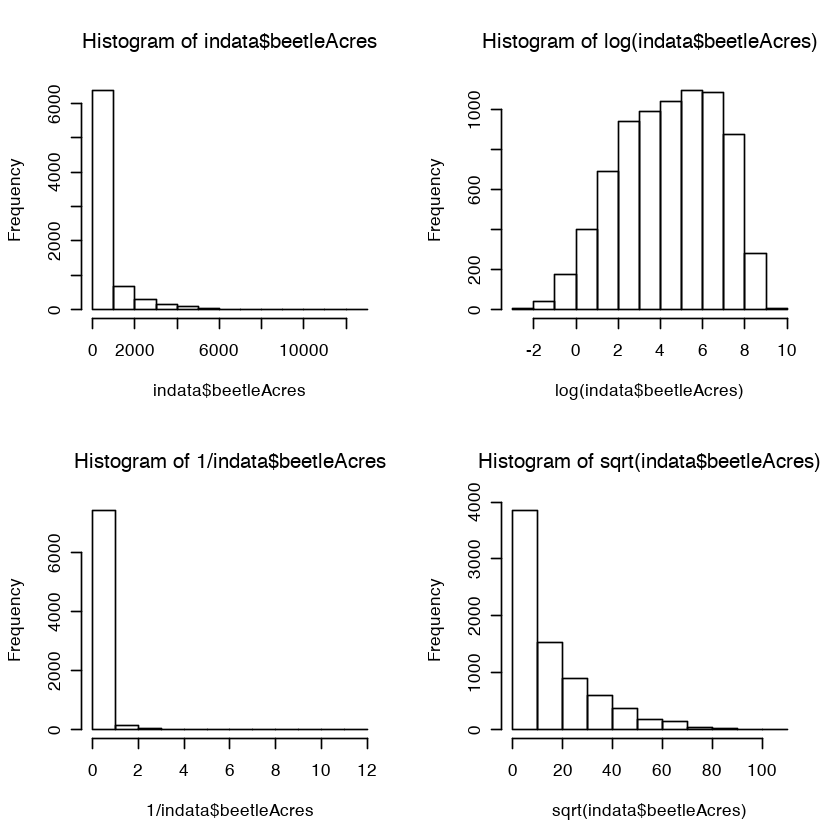

In [17]:
par(mfrow=c(2, 2))
hist(indata$beetleAcres)
hist(log(indata$beetleAcres))
hist(1 / indata$beetleAcres)
hist(sqrt(indata$beetleAcres))

In [22]:
summary(indata$SprsCPA)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     0.0    282.1    830.8   3382.2   2716.3 492000.0 

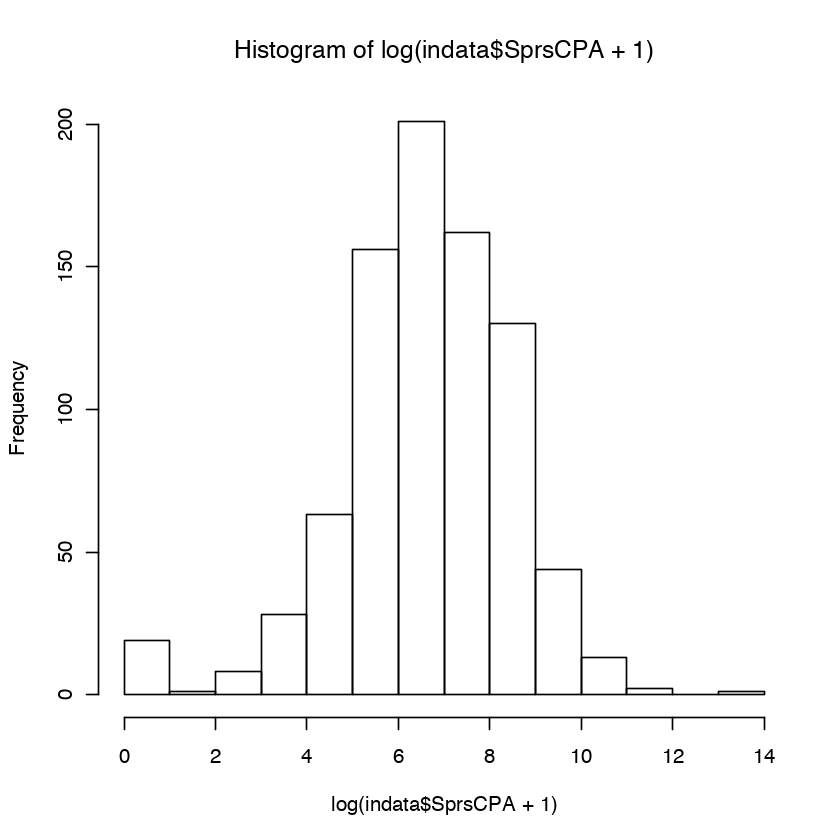

In [23]:
hist(log(indata$SprsCPA + 1))

In [24]:
indata$SprsCPA <- log(indata$SprsCPA + 1)
names(indata)[which(names(indata) == 'SprsCPA')] <- 'logSprsCPA.p1'

In [18]:
# write.csv(indata, sprintf('%s/mpb10km_data_clean.csv', DATA), row.names=FALSE) # with all predictors
# write.csv(indata, sprintf('%s/mpb10km_data_wo_costs.csv', DATA), row.names=FALSE) # removed suppression costs
# write.csv(indata, sprintf('%s/mpb10km_data_wo_firedata.csv', DATA), row.names=FALSE) # removed fire suppression data
write.csv(indata, sprintf('%s/mpb10km_data_wo_FIA.csv', DATA), row.names=FALSE)

In [19]:
library(rcompanion)
library(MASS)

In [20]:
length(indata$beetleAcres)

[1] 7636

In [21]:
y <- indata$beetleAcres
y.tuk <- transformTukey(sample(y,5000),plotit=FALSE)


    lambda      W Shapiro.p.value
403   0.05 0.9825        2.08e-24

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 



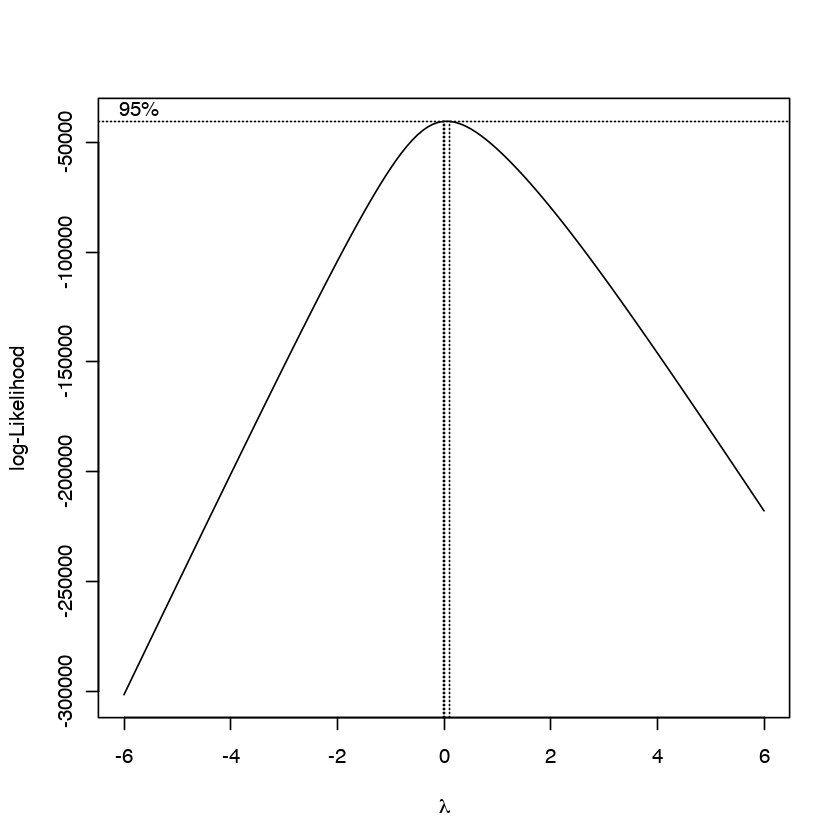

In [23]:
Box <- boxcox(y ~ 1, lambda = seq(-6,6,0.1)) 

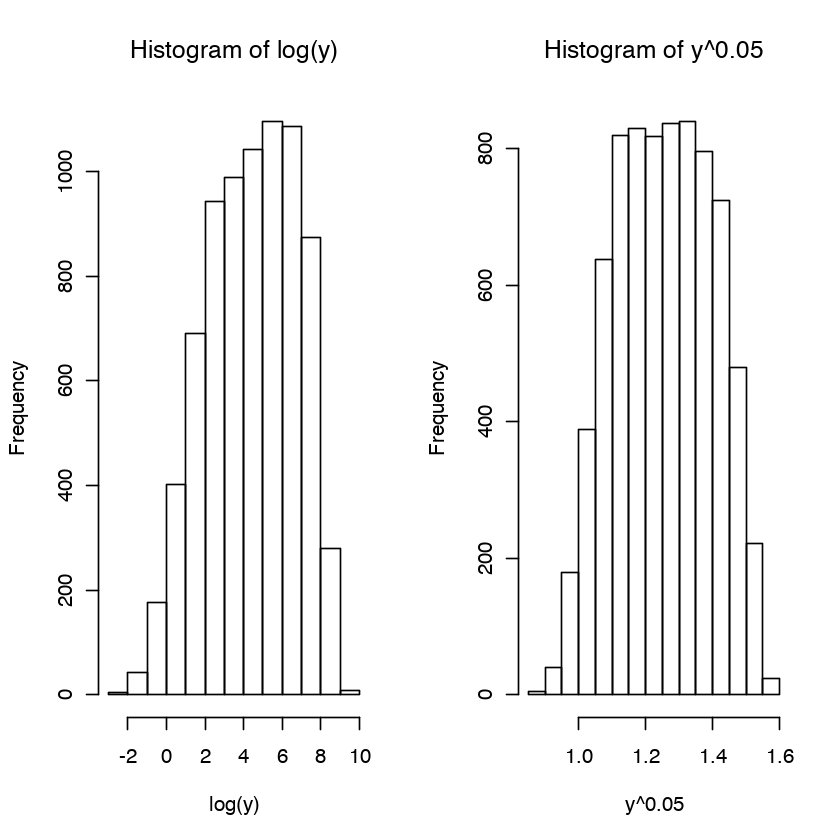

In [27]:
par(mfrow=c(1, 2))
hist(log(y))
hist(y ^ 0.05)